In [1]:
#import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from math import isnan
plt.style.use('fivethirtyeight')

In [2]:
#Store the data into the df variable
df = pd.read_csv('../../data/dump.csv')

In [3]:
#Set the date as the index for the data
df = df.set_index(pd.DatetimeIndex(df['time'].values))
#Show the dataframe

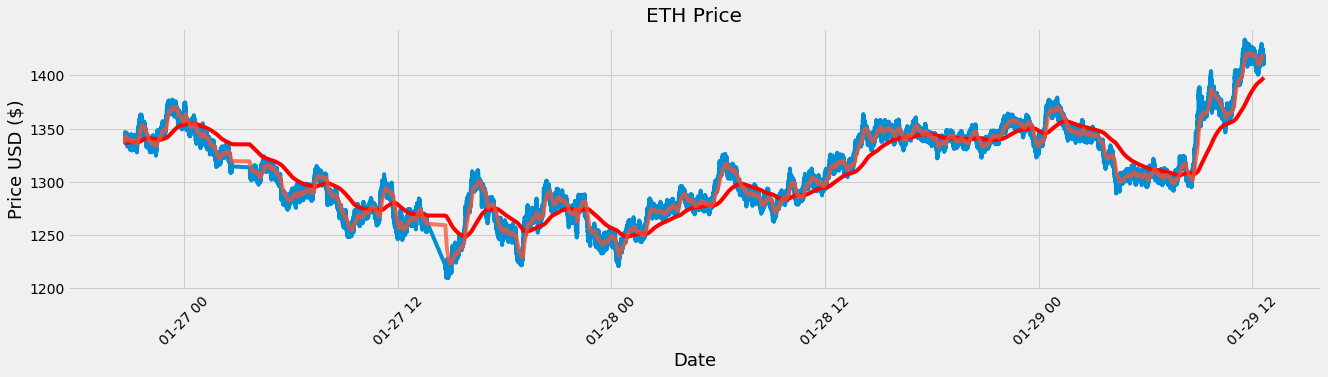

In [4]:
# Visually Show The Stock Price(s)
# Create the title
title = 'ETH Price'
#Get the stocks
my_stocks = df
#Create and plot the graph
plt.figure(figsize=(20,4.5)) #width = 12.2in, height = 4.5
plt.plot( my_stocks['price'],  label='price')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)

df.insert(2,"ma",df.price.ewm(span=60, adjust=True).mean())
df.insert(3,"ewm",df.ma.ewm(span=600, adjust=False).mean())
df.insert(4,"diff",df[['ewm']].diff())
df.insert(5,"jerk",df[['diff']].diff())
# print(df.tail(50))

plt.plot(df.index, df['ewm'], label='Exponential moving average', color = 'red')
plt.plot( df['ma'],  label='moving average', alpha = 0.75)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)

plt.xticks(rotation=45) 
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

In [5]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  bought = 0
  bought_at = None
  t = []
  for i in range(0,len(signal)):
      if isnan(signal['diff'][i]) or i < 400:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      elif (signal['diff'][i] > .025) and signal['diff'][i-1] <= 0.025:
        if bought != 1:
          # BUY
          sigPriceBuy.append(signal['price'][i])
          sigPriceSell.append(np.nan)
          bought = 1
          bought_at = signal['price'][i]
        else:
          # HOLD
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)

      elif signal['diff'][i] <= 0.00: 
        if bought != 0:
          # SELL
          sigPriceSell.append(signal['price'][i])
          sigPriceBuy.append(np.nan)
          # print(f"Bought at {bought_at} selling at {signal['price'][i]} for profit {signal['price'][i] - bought_at - 2}")
          t.append(signal['price'][i] - bought_at - 2)
          bought = 0
        else:
          # DO NOTHING
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return ((sigPriceBuy, sigPriceSell), t)



# r = mac_daddy_tester(MACD, signal, df)
# print("Profit", r[0])
# print("trans: ", len(r[1]))
# print(r[1])

Transactions:  14
PROFITS: -176.2771469999998


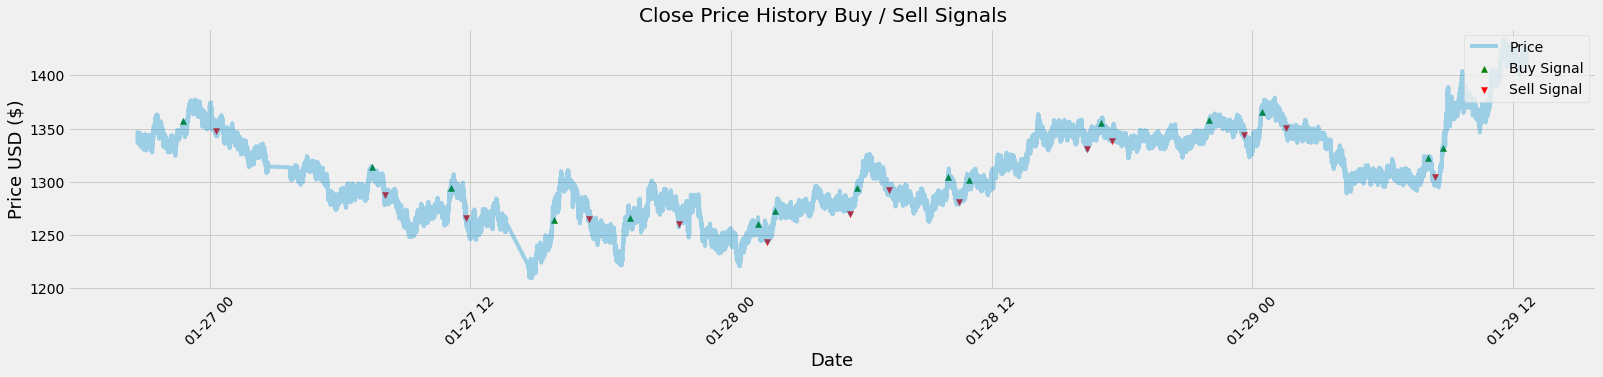

In [6]:
#Create buy and sell columns
x, t = buy_sell(df)
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]
print("Transactions: ",len(t))
print("PROFITS:",sum(t))

# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Close Price History Buy / Sell Signals   '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2*2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks['price'],  label='Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.legend( loc='upper right')
plt.show()